#**K-NEAREST NEIGHBOURS**

**Objective:**

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets.

**Dataset:**

Need to Classify the animal type

**Tasks:**
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


###**Step 1: Load and Inspect the Dataset**

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [173]:
# Load the dataset
file_path = r'/content/Zoo.csv'
df_zoo = pd.read_csv(file_path)

In [174]:
# Display the first few rows of the dataset
print(df_zoo.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [175]:
print(df_zoo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [176]:
#Summary Statistics
print(df_zoo.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

**Animal Characteristics:**
- A significant proportion of animals in the dataset have specific traits like a backbone (82.18%), breathes (79.21%), and are toothed (60.40%).
- Less common traits include having feathers (19.80%), being venomous (7.92%), and being domestic (12.87%).

**Behavioral Traits:**
- About 55.45% of the animals are predators, which is slightly higher than half of the dataset.
- Only 35.64% of the animals are aquatic, while 23.76% are airborne.

**Physical Features:**
- The majority of animals do not have fins (83.17%) or tails (74.26%).
- The number of legs varies widely, with the most common being 4 legs, but there is a notable presence of animals with 0, 2, or even 8 legs.

**Categorization:**
- The type feature, likely indicating different classes or groups of animals, shows a broad range of types, with a central tendency around type 2 or 3, but significant diversity across the dataset.

In [177]:
df_zoo.shape

(101, 18)

In [178]:
#Number of columns
df_zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [179]:
#Unique values in columns
for col in df_zoo.columns:
    unique_values = df_zoo[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'animal name': ['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
Unique values in column 'hair': [1 0]
Unique values in colum

In [180]:
#Target variable values
df_zoo['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

Five unique values

###**Step 2: Analyze the Data Using Visualizations**

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


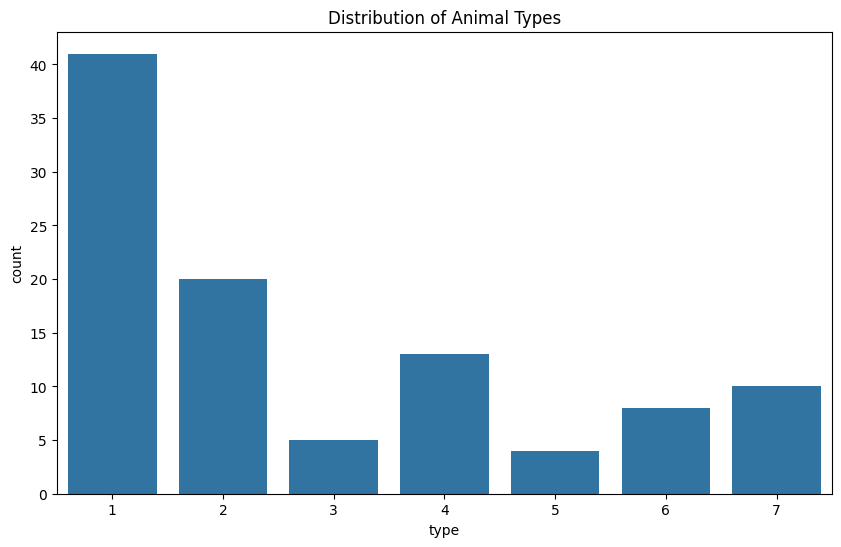

In [181]:
# Visualize the distribution of animal types
plt.figure(figsize=(10, 6))
# Verify the correct column name and existence in the DataFrame
print(df_zoo.columns)  # Print available columns to check for 'animal_type'
# If the column name is different, correct it in the line below
sns.countplot(x='type', data=df_zoo)
plt.title('Distribution of Animal Types')
plt.show()

- **Type 1** is the most common, with over 40 animals falling into this category.
- **Type 2** also has a significant representation, with around 20 animals.
- **Type 4** and **Type 7** have moderate representation, each with approximately 10-15 animals.
- **Types 3, 5, and 6** are less common, with fewer than 10 animals in each.

Overall, the dataset appears to be heavily skewed towards **Type 1**, with a gradual decrease in the number of animals as the type number increases. This suggests that **Type 1** might represent a dominant or more general category of animals compared to the others.

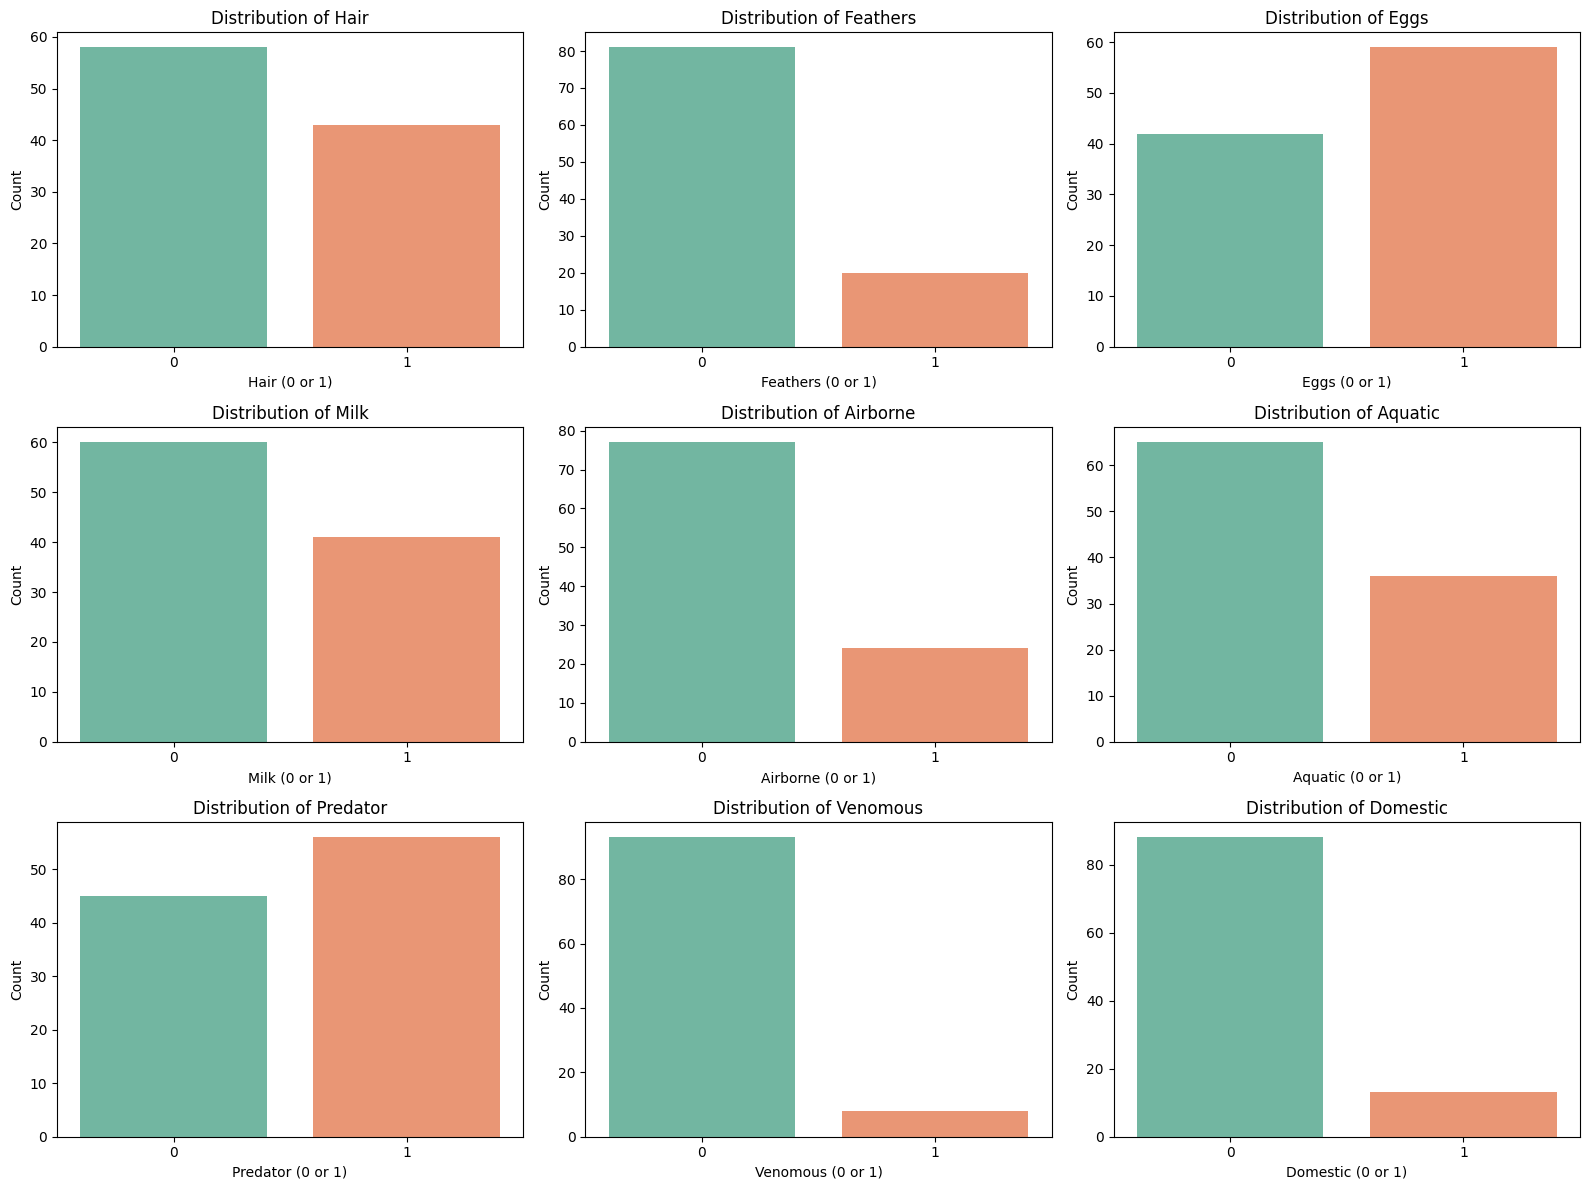

In [182]:
# Plotting the distribution of selected binary features
plt.figure(figsize=(16, 12))
binary_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'venomous', 'domestic']
for i, feature in enumerate(binary_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data= df_zoo, palette="Set2")
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(f'{feature.capitalize()} (0 or 1)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The binary feature distributions provide insights into the characteristics of the animals:
- **Hair and Milk:** A significant portion of the animals have hair and produce milk, indicating a dominance of mammals.
- **Feathers and Eggs:** Fewer animals have feathers, but many lay eggs, consistent with the presence of birds and reptiles in the dataset.
- **Airborne and Aquatic:** The data contains both airborne and aquatic animals, but more animals are neither.
- **Predator and Venomous:** The dataset includes predators, but fewer animals are venomous.
- **Domestic:** Only a small portion of animals are domestic, suggesting a focus on wild species.

These features can provide crucial information for classifying animals into their respective types.

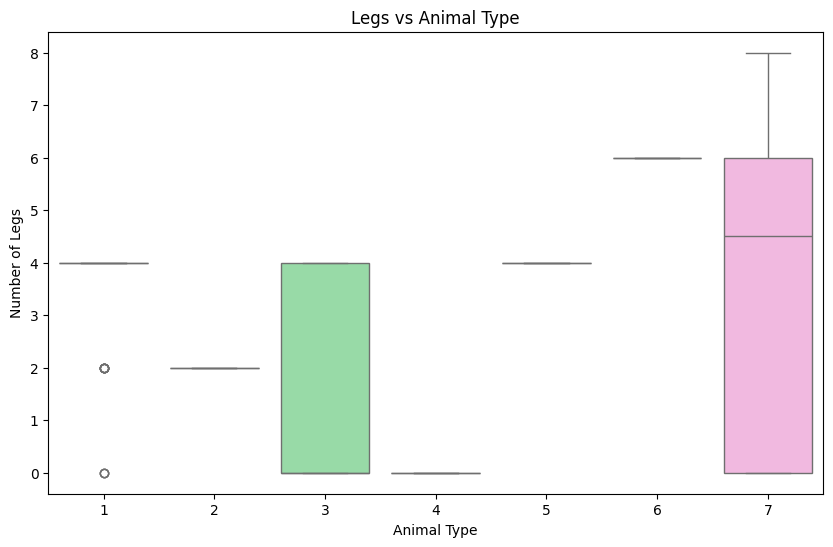

In [183]:
# Plot the relationship between 'legs' and 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='legs', data= df_zoo, palette="pastel")
plt.title('Legs vs Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Number of Legs')
plt.show()

- The box plot shows the distribution of the number of legs across different animal types.
- **Types 1, 2, and 3** mostly have 4 legs, which is typical of mammals and certain reptiles.
- **Type 6** primarily has no legs, likely representing fish or other legless creatures.
The variation in leg counts across types could be a strong differentiating factor when classifying animals.

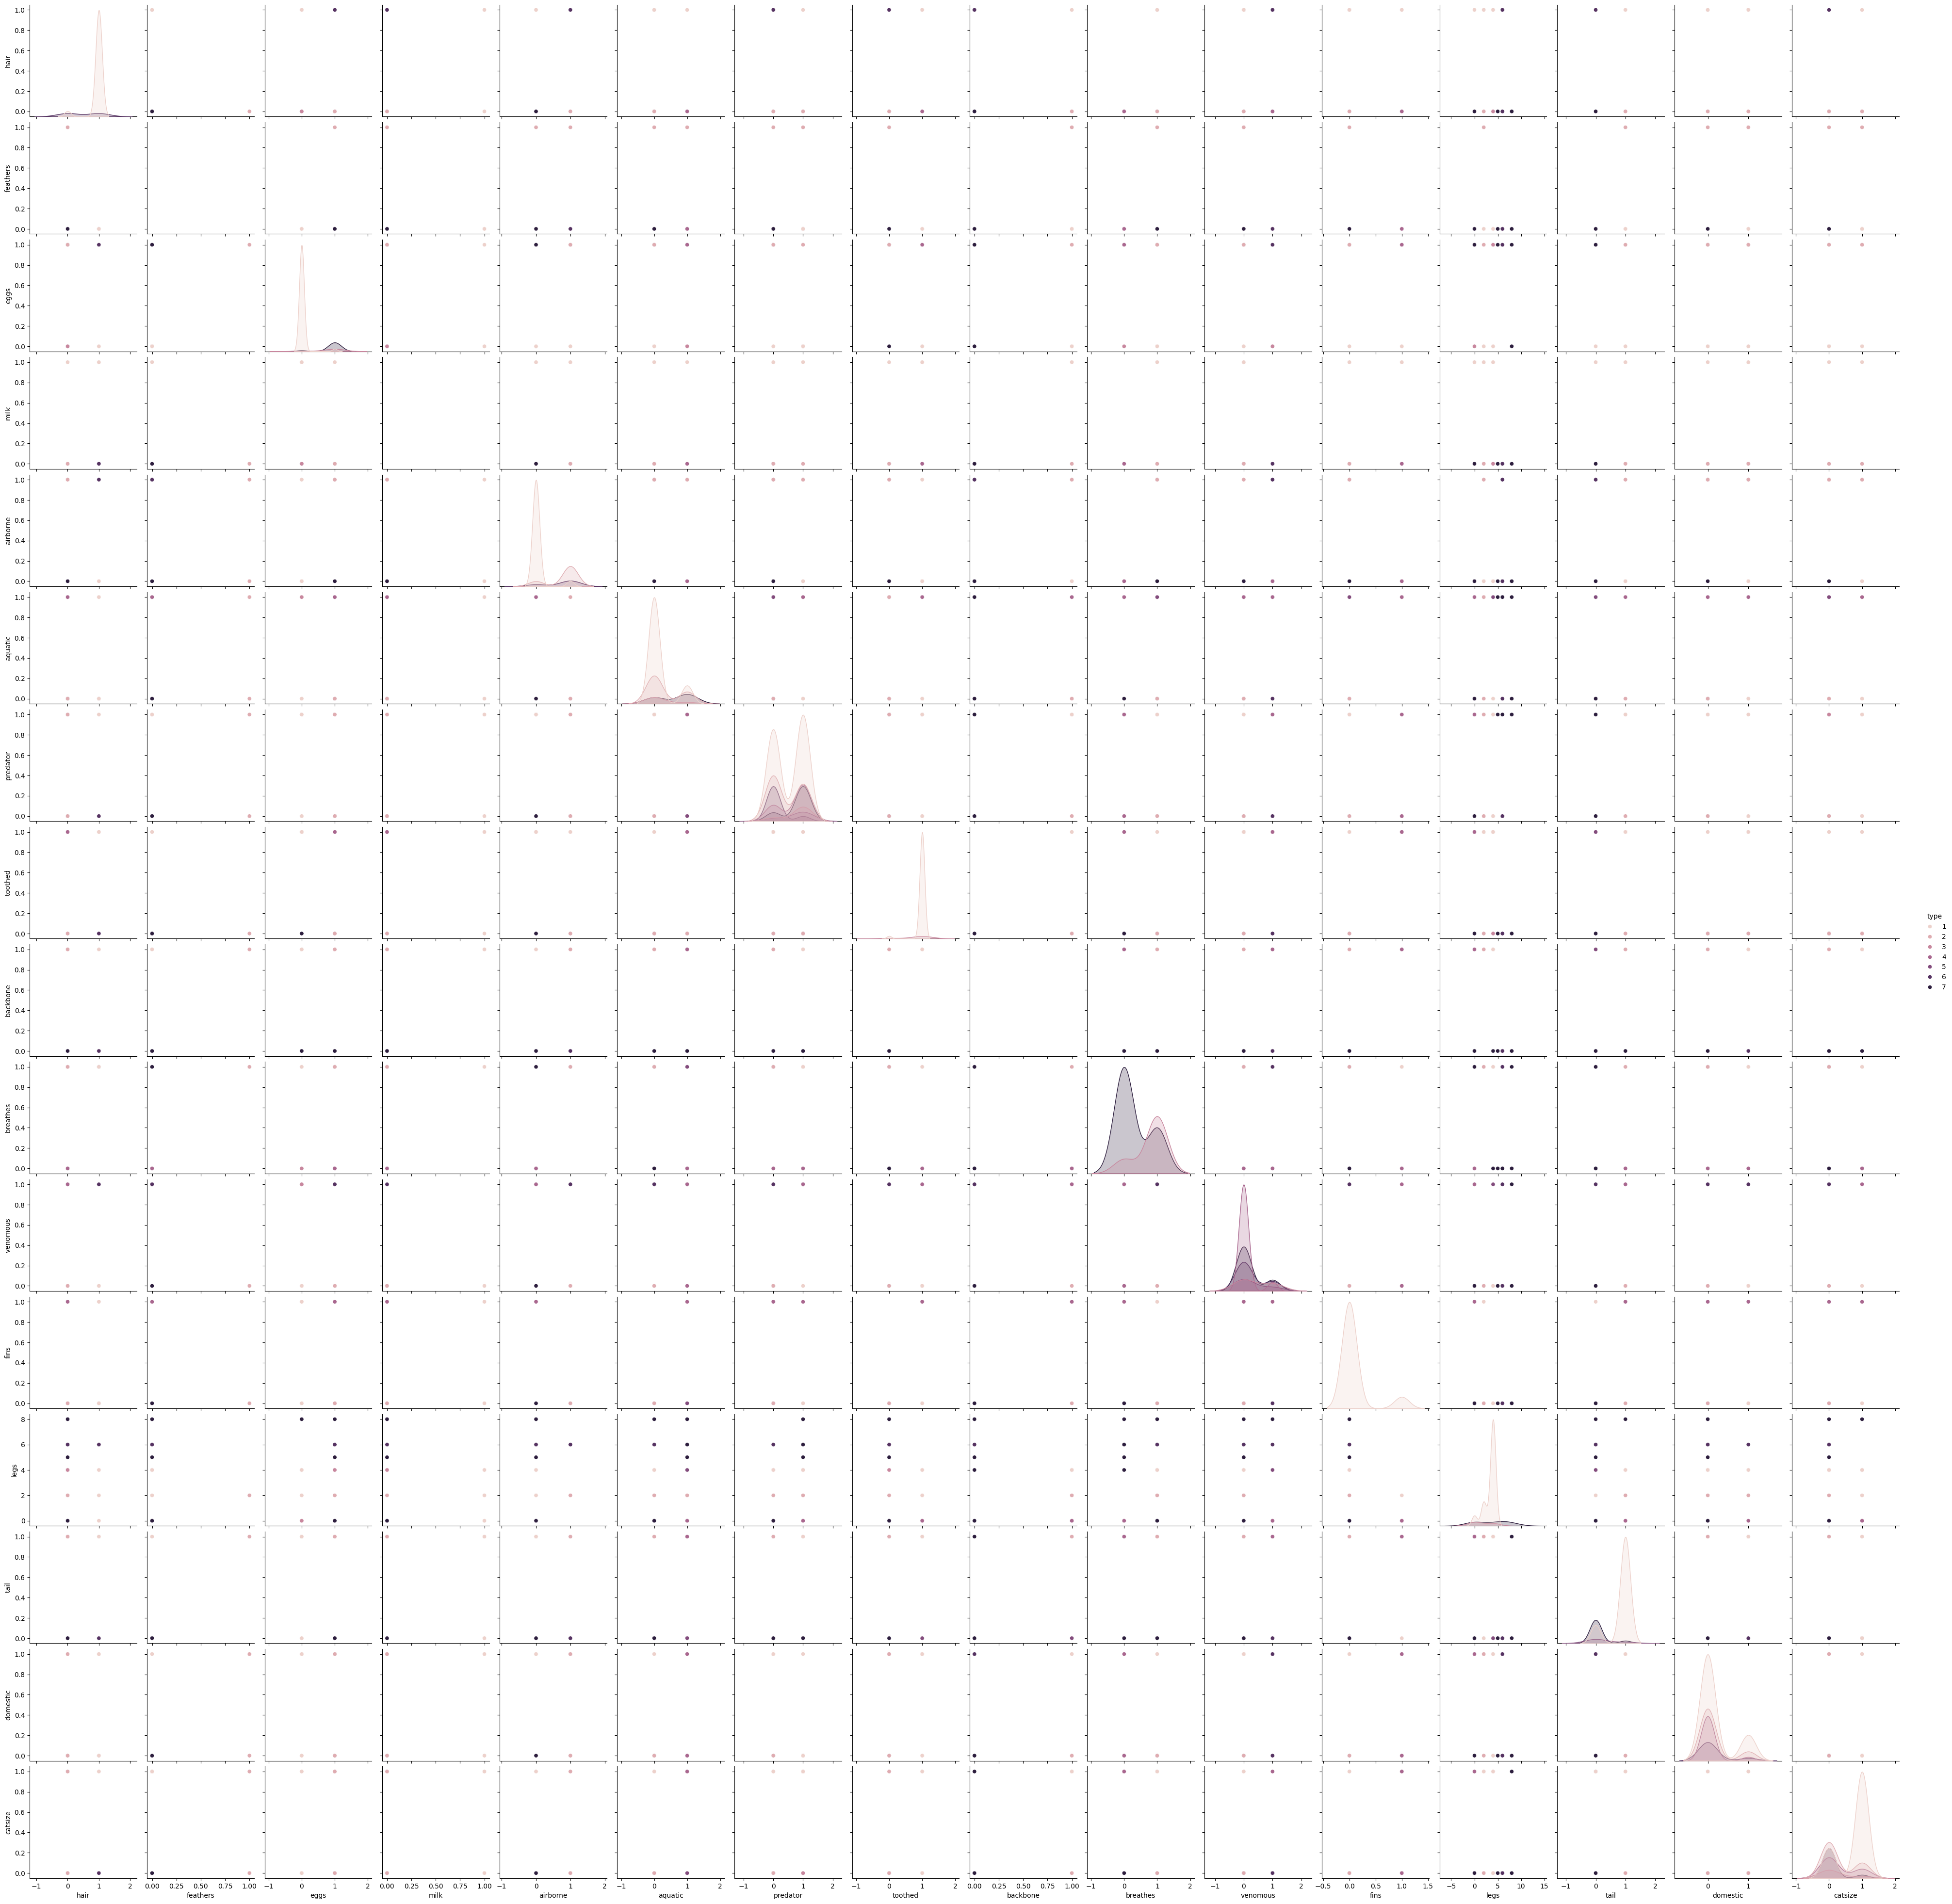

In [184]:
# Pairplot to see relationships between features
sns.pairplot(df_zoo, hue='type')
plt.show()

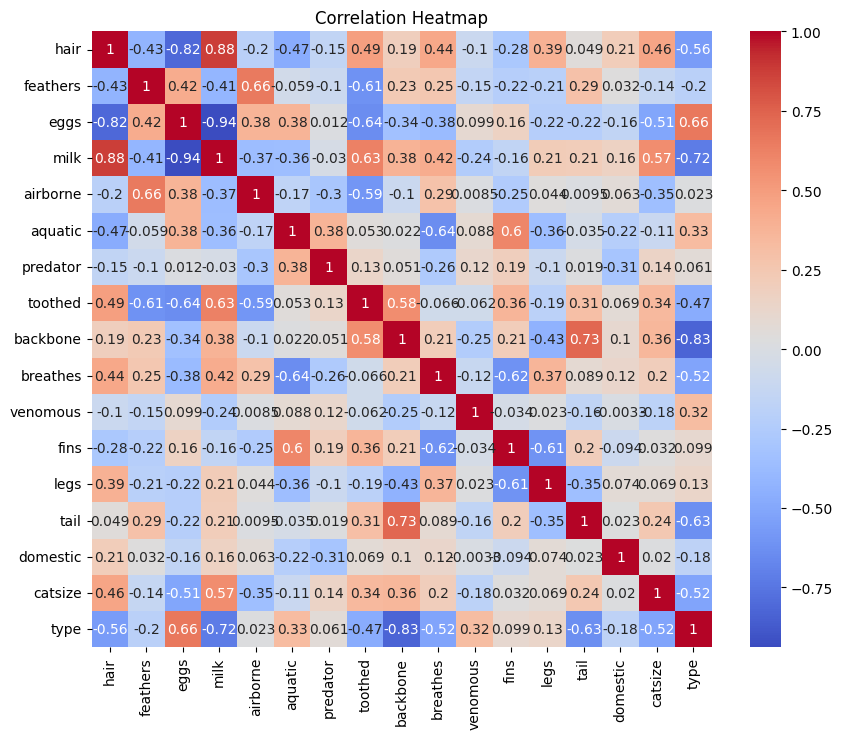

In [185]:
#Heatmap
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_df = df_zoo.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

####**Strong Correlations with the Target Variable (type):**

#####**Negative Correlations:**
- **Backbone (-0.83):** There is a strong negative correlation with type, indicating that as the type number increases, the likelihood of having a backbone decreases.
- **Hair (-0.56):** Animals with hair tend to belong to lower type numbers, suggesting that hair is more common in certain types (possibly mammals).
- **Breathes (-0.52):** The ability to breathe is negatively correlated with type, meaning that higher type numbers are less likely to include animals that breathe air.
- **Milk (-0.72):** Animals that produce milk are more likely to belong to lower type numbers.

#####**Positive Correlations:**

- **Eggs (0.66):** There's a strong positive correlation between laying eggs and type, indicating that as the type number increases, the likelihood of laying eggs increases.
- **Aquatic (0.33):** A moderate positive correlation exists between being aquatic and type, suggesting that higher type numbers may include more aquatic animals.

**Step 3: Preprocess the Data**

In [186]:
# Check for missing values
print(df_zoo.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


**No missing values**

In [187]:
# Step 1: Create a new column to keep the original numerical values
df_zoo['type_category'] = df_zoo['type']
#Typecasting
df_zoo['type_category'] = df_zoo['type_category'].astype('category')

In [188]:
#feature transformation
# Step 2: Define the mapping from numerical values to categorical labels
#label encoding type values [1 4 2 7 6 5 3]
type_mapping = {
    1: 'Mammal',
    2: 'Bird',
    3: 'Reptile',
    4: 'Fish',
    5: 'Amphibian',
    6: 'Insect',
    7: 'Arachnid'
}
# Step 2: Map the values
df_zoo['type_category'] = df_zoo['type_category'].map(type_mapping)
# Now df['type'] contains the categorical labels, and df['type_numeric'] contains the original numerical values

In [189]:
df_zoo['type_category']

0        Mammal
1        Mammal
2          Fish
3        Mammal
4        Mammal
         ...   
96       Mammal
97       Insect
98       Mammal
99     Arachnid
100        Bird
Name: type_category, Length: 101, dtype: category
Categories (7, object): ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Insect', 'Arachnid']

In [190]:
#First few rows with new col
df_zoo.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type type_category  
0     1        Mammal  
1     1        Mammal  
2     4          Fish  
3     1        Mammal  
4     1        Mammal

In [191]:
print(df_zoo['type'].dtype)  # Check the data type of the 'type' column
print(type_mapping.keys())  # Check the data type of the keys in the mapping dictionary
print(type_mapping.values())

int64
dict_keys([1, 2, 3, 4, 5, 6, 7])
dict_values(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Insect', 'Arachnid'])


In [192]:
nan_rows = df_zoo[df_zoo['type'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [animal name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize, type, type_category]
Index: []


In [193]:
numerical_cls = df_zoo.select_dtypes(include=['number'])
#Detect outliers
outliers = {}

for col in numerical_cls.columns:
    Q1 = np.quantile(numerical_cls[col], 0.25)
    Q3 = np.quantile(numerical_cls[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = numerical_cls[(numerical_cls[col] < lower_bound) | (numerical_cls[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")


No outliers in hair

Outliers in feathers:
11     1
16     1
20     1
21     1
23     1
33     1
37     1
41     1
43     1
56     1
57     1
58     1
59     1
71     1
78     1
79     1
83     1
87     1
95     1
100    1
Name: feathers, dtype: int64

No outliers in eggs

No outliers in milk

Outliers in airborne:
11     1
16     1
20     1
21     1
23     1
27     1
30     1
33     1
37     1
39     1
40     1
42     1
43     1
51     1
57     1
59     1
78     1
79     1
83     1
87     1
93     1
95     1
97     1
100    1
Name: airborne, dtype: int64

No outliers in aquatic

No outliers in predator

No outliers in toothed

Outliers in backbone:
13    0
14    0
15    0
24    0
30    0
39    0
40    0
42    0
46    0
51    0
53    0
72    0
77    0
81    0
85    0
88    0
97    0
99    0
Name: backbone, dtype: int64

Outliers in breathes:
2     0
7     0
8     0
12    0
13    0
14    0
15    0
18    0
34    0
38    0
46    0
53    0
60    0
61    0
73    0
76    0
77    0
82    0
85

In [194]:
#Handle outliers if present
def handle_outliers(df, column, method='retain', lower_cap=None, upper_cap=None):
    """
    Handle outliers in the specified column of the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - column (str): The column in which to handle outliers.
    - method (str): The method to handle outliers ('retain', 'remove', 'cap').
    - lower_cap (int or float): The lower cap value for outliers (used only if method='cap').
    - upper_cap (int or float): The upper cap value for outliers (used only if method='cap').

    Returns:
    - DataFrame: The DataFrame with outliers handled as specified.
    """

    # Identify outliers using IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

    if method == 'remove':
        # Remove outliers
        df = df.drop(outliers.index)
    elif method == 'cap':
        # Cap outliers
        if lower_cap is not None:
            df.loc[df[column] < lower_cap, column] = lower_cap
        if upper_cap is not None:
            df.loc[df[column] > upper_cap, column] = upper_cap
    # If method is 'retain', do nothing (outliers are retained)

    return df

# Example usage:
# Cap outliers in the 'legs' column with a lower cap of 0 and an upper cap of 4
df_zoo = handle_outliers(df_zoo, 'legs', method='cap', lower_cap=0, upper_cap=4)

# Alternatively, you can retain or remove outliers in other columns as needed
# Handle outliers in 'venomous'
df_zoo = handle_outliers(df_zoo, 'venomous', method='retain')  # Retain outliers as they are valid

# Handle outliers in 'fins'
df_zoo = handle_outliers(df_zoo, 'fins', method='retain')  # Retain outliers as they are valid

# Handle outliers in 'domestic'
df_zoo = handle_outliers(df_zoo, 'domestic', method='retain')  # Retain outliers as they are valid



**Step 4: Split the Dataset**

In [195]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df_zoo.drop(columns=['type'])  # Assuming 'type' is the target variable
y = df_zoo['type']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')


Training set shape: X_train: (80, 18), y_train: (80,)
Testing set shape: X_test: (21, 18), y_test: (21,)


**Step 5: Implement K-Nearest Neighbours**

In [197]:
# Drop the 'type_category' column if it exists. Keep the 'animal name' column
# 'animal name' is likely a useful feature for the model.
# Double-check the column names in your DataFrame to ensure they are correct.
# Use X_train.columns to see the available columns.
if 'type_category' in X_train.columns:
    X_train = X_train.drop(columns=['type_category'])
if 'type_category' in X_test.columns:
    X_test = X_test.drop(columns=['type_category'])

# Drop the 'animal name' column as it is a string column
if 'animal name' in X_train.columns:
    X_train = X_train.drop(columns=['animal name'])
if 'animal name' in X_test.columns:
    X_test = X_test.drop(columns=['animal name'])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

**Step 6:Choosing distance metric and value for K.**

In [198]:
from sklearn.model_selection import cross_val_score

# Range of K values to try
k_range = range(1, 21)

# Store the mean cross-validation scores for each K
mean_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

# Find the best K
best_k = k_range[mean_scores.index(max(mean_scores))]
print(f'Best K: {best_k}')

# Initialize KNN with the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=2)
knn_best.fit(X_train, y_train)


Best K: 1


KNeighborsClassifier(n_neighbors=1)

**Step 7: Evaluate the Classifier**

In [199]:
# Predict on the test set
##y_pred = knn.predict(X_test)
# Predict on the test set using the fitted knn_best model
y_pred = knn_best.predict(X_test)

In [200]:
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9523809523809523
Precision: 0.9523809523809523
Recall: 0.9523809523809523
F1 Score: 0.9523809523809523


In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



In [202]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(knn,X_train, y_train, cv=5, scoring='accuracy')
# Print cross-validation results
print(f'Cross-validation accuracy scores: {scores}')

Cross-validation accuracy scores: [0.8125 0.8125 0.8125 0.8125 0.875 ]


**Step 7: Visualize Decision Boundaries**

In [203]:
# Reduce to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [204]:
# Fit KNN on reduced data
knn_2d = KNeighborsClassifier(n_neighbors=1)
knn_2d.fit(X_train_2d, y_train)

KNeighborsClassifier(n_neighbors=1)

In [205]:
# Plot decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

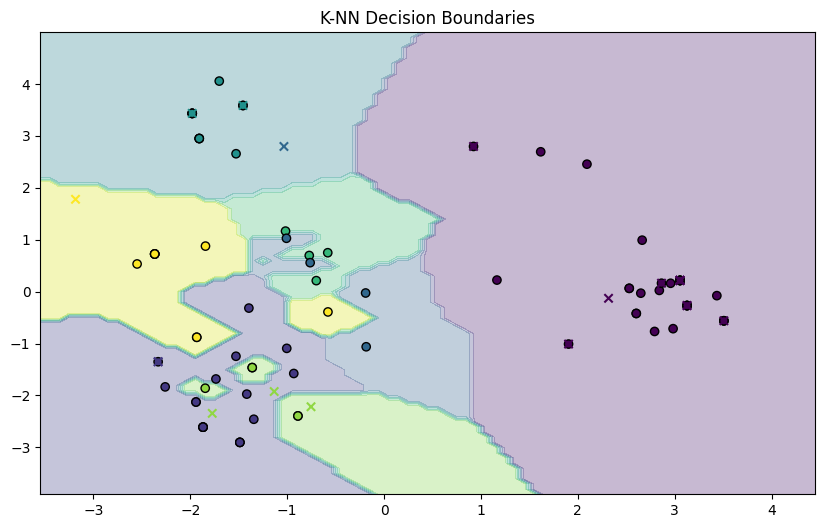

In [206]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', marker='x')
plt.title('K-NN Decision Boundaries')
plt.show()

**Decision Boundaries:**
- The shaded regions represent the decision boundaries created by the K-NN algorithm. Each color corresponds to a different class.
- These boundaries show how the algorithm classifies new data points based on their proximity to existing points.

**Class Distribution:**
- The distribution of data points within each region indicates how the classes are spread out in the feature space.
- Dense clusters of points suggest areas where the algorithm is more confident in its classification.

**Class Overlap:**
- Areas where different colors meet indicate regions where classes overlap.
- In these regions, the algorithm might have a harder time making accurate classifications due to the proximity of different classes.

**K-NN Algorithm Behavior:**
- The shape and complexity of the boundaries can give insights into the behavior of the K-NN algorithm.
- Smooth boundaries suggest a lower value of ( k ), while more complex, jagged boundaries might indicate a higher ( k ).


###**Interview Questions:**
####**1. What are the key hyperparameters in KNN?**

The key hyperparameters in the K-Nearest Neighbours (KNN) algorithm include:

- **Number of Neighbors (K):** This is the primary hyperparameter in KNN, determining the number of nearest neighbors to consider when making a classification or regression decision. The choice of K can significantly impact the performance of the algorithm. A small value of K can make the model sensitive to noise, while a large value of K can smooth out the decision boundaries too much.

- **Distance Metric:** The distance metric determines how the distance between data points is calculated. Common distance metrics include Euclidean distance, Manhattan distance, Minkowski distance, and others. The choice of distance metric can affect the performance of the algorithm depending on the data distribution.

- **Weight Function:** This parameter specifies the weight function used in prediction. The options include:
   - **Uniform weights:** All neighbors have equal influence.
   - **Distance weights:** Closer neighbors have a greater influence on the prediction.

- **Algorithm:** The algorithm used to compute the nearest neighbors. Options include:

    - **Brute-force search:** Calculates the distance between each pair of data points.
    - **BallTree:** A tree structure used for efficient nearest neighbor searches.
    - **KDTree:** Another tree structure for efficient nearest neighbor searches.

- **Leaf Size:** This hyperparameter is used in tree-based algorithms (BallTree and KDTree) and controls the size of the leaf nodes in the tree. It can affect the speed of the search and the memory required to store the tree.

- **P:** This parameter is used for the Minkowski distance metric and determines the power parameter. When p=1, it is equivalent to the Manhattan distance, and when p=2, it is equivalent to the Euclidean distance.

####**2. What distance metrics can be used in KNN?**

1. **Euclidean Distance:** The most common distance metric, which calculates the straight-line distance between two points in Euclidean space.

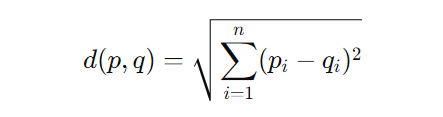

2. **Manhattan Distance (or L1 Distance):** Calculates the distance between two points by summing the absolute differences of their coordinates.

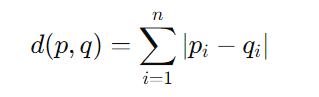

3. **Minkowski Distance:** A generalized distance metric that includes both Euclidean and Manhattan distances as special cases.

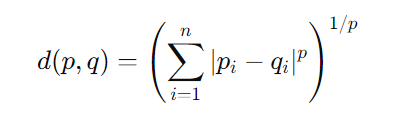

When
p=1, it is equivalent to the Manhattan distance, and when 𝑝 = 2
p=2, it is equivalent to the Euclidean distance.

4. **Chebyshev Distance:** Calculates the maximum absolute difference between the coordinates of the points.

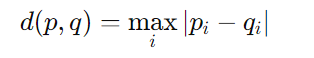

**5. Cosine Similarity:** Measures the cosine of the angle between two non-zero vectors. It is often used in high-dimensional spaces.

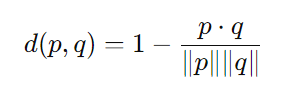

6. **Hamming Distance:** Measures the number of positions at which the corresponding elements are different. It is commonly used for categorical data.

